# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#Your code here
import pandas as pd
import flatiron_stats as fstats

In [4]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resul

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [5]:
df.FormalEducation.value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [6]:
df.CompensationAmount.dropna().describe()

count    5.178000e+03
mean     4.129494e+07
std      1.965335e+09
min     -9.900000e+01
25%      5.000000e+04
50%      9.000000e+04
75%      1.900000e+05
max      1.000000e+11
Name: CompensationAmount, dtype: float64

In [20]:
ed_ms = "Master's degree"
ed_ba = "Bachelor's degree"
ed_col = 'FormalEducation'
comp_col = 'AdjustedCompensation'

In [21]:
df_ms = df_ms.dropna(subset=[ed_col, comp_col])
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4342 entries, 3 to 26378
Data columns (total 2 columns):
FormalEducation         4342 non-null object
AdjustedCompensation    4342 non-null float64
dtypes: float64(1), object(1)
memory usage: 101.8+ KB


In [36]:
s1 = df_ms[df_ms[ed_col] == ed_ms][comp_col]
s2 = df_ms[df_ms[ed_col] == ed_ba][comp_col]

In [37]:
print('Comparison of {} for {} and {}'.format(comp_col, ed_ms, ed_ba))
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fstats.p_value_welch_ttest(s1, s2))

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	s1: 53812.17 	s2: 38399.4
Mean Values: 	s1: 69139.9 	s2: 64887.1
Sample sizes: 	s1: 1990 	s2: 1107
Welch's t-test p-value: 0.33077639451272445


In [38]:
a = df_ms[df_ms.FormalEducation == "Bachelor's degree"]
b = df_ms[df_ms.FormalEducation == "Master's degree"]

In [30]:
a.size, b.size

(2214, 3980)

In [32]:
a.head()

,FormalEducation,AdjustedCompensation
8,Bachelor's degree,64184.800
9,Bachelor's degree,20882.400
11,Bachelor's degree,1483.900
21,Bachelor's degree,20000.000
25,Bachelor's degree,10858.848


In [33]:
fstats.p_value_welch_ttest(a.AdjustedCompensation, b.AdjustedCompensation)

0.33077639451272445

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [39]:
ed_phd = "Doctoral degree"
s1 = df_ms[df_ms[ed_col] == ed_phd][comp_col]
s2 = df_ms[df_ms[ed_col] == ed_ba][comp_col]

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


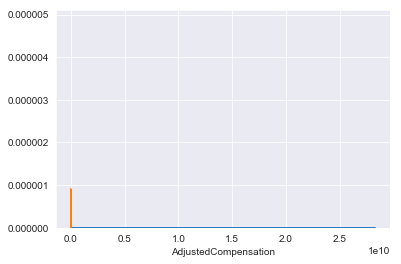

In [41]:
sns.distplot(s1)
sns.distplot(s2)

In [42]:
print("Median Values:")
print('s1: {}'.format(s1.median()))
print('s2: {}'.format(s2.median()))
print("Sample Sizes:")
print('s1: {}'.format(len(s1)))
print('s2: {}'.format(len(s2)))
print("Welch's T-test p-value: {}".format(fstats.p_value_welch_ttest(s1, s2)))

Median Values:
s1: 74131.91999999997
s2: 38399.4
Sample Sizes:
s1: 967
s2: 1107
Welch's T-test p-value: 0.15682381994720251


In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


In [45]:
s1_no_outliers = s1[s1 < 500000]
s2_no_outliers = s2[s2 < 500000]

In [46]:
print("Median Values:")
print('s1: {}'.format(s1_no_outliers.median()))
print('s2: {}'.format(s2_no_outliers.median()))
print("Sample Sizes:")
print('s1: {}'.format(len(s1_no_outliers)))
print('s2: {}'.format(len(s2_no_outliers)))
print("Welch's T-test p-value: {}".format(fstats.p_value_welch_ttest(s1_no_outliers, s2_no_outliers)))

Median Values:
s1: 73152.77
s2: 38292.15
Sample Sizes:
s1: 964
s2: 1103
Welch's T-test p-value: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [51]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [52]:
#Your code here
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df_ms).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [53]:
df_ms_no_outliers = df_ms[df_ms.AdjustedCompensation < 500000]
lm = ols(formula, df_ms_no_outliers).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.860266e+11     6.0  29.701947  4.496916e-35
Residual            1.420249e+13  4319.0        NaN           NaN


Removing outliers above 500,000 then Education is a factor in adjusted compensation

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!